___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU") # Runtime(Çalışma zamanı) kısmında GPU kullanıyorsak bir çıktı gelecek, None seçiliyse çıktı gelmeyecek

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset
# Datada el yazıları var. Training için büro elemanlarının, test için öğrencilerin el yazıları alınmış
# .. Sonra böyle yapmak uygun değil diye bunlar karıştırılmış ve training, test datası oluşturulmuş
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[9].shape # 9. indexin shape i # 28x28 lik bir resimmiş

(28, 28)

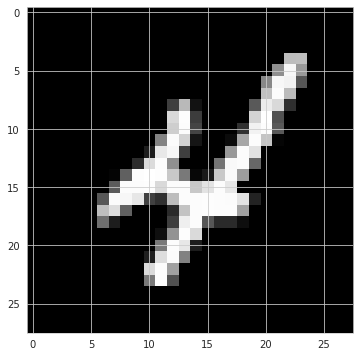

In [6]:
plt.imshow(X_train[9],cmap='gray')  # cmap='gray' yazmazsanız çalışır. Resmi renkli şekilde görebilirsiniz(Bunlara yalancı renkler diyoruz)
# Yani resim renkli değil aslında
# plt.matshow(X_train[9])

In [7]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train[9]

4

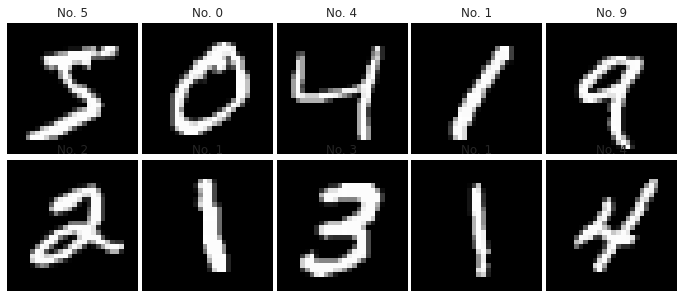

In [10]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Resimleri görmek istedik burada.

# Data Preprocessing

In [13]:
# X_train, X_test, y_train, y_test bize hazır geldi burada. Bazı durumlarda kendimiz yapmamız gerekecek
X_train[9].min()

0

In [14]:
X_train[9].max() # Değerler 0 ile 255 arasında değişiyor değerler. Biz CNN de scaling yapmak avantaj sağlıyor

255

In [15]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Buradaki scaling i max değere bölerek yapıyoruz. Ancak zaten scale edilmiş resimlerde olabilir. O zaman bizim
# .. scale etmemize gerek kalmayacak.

In [16]:
X_train[9].min()

0.0

In [17]:
X_train[9].max()

1.0

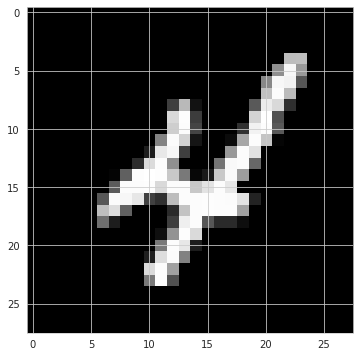

In [18]:
plt.imshow(X_train[9],cmap='gray')

In [19]:
X_train.shape, X_test.shape  # 60000 tane 28x28 lik ve 10000 tane 28x28 lik resimler varmış.

((60000, 28, 28), (10000, 28, 28))

In [20]:
X_train.reshape(60000, 28, 28, 1).shape # reshape ile 1 ekliyoruz(Channel sayısı). Bunu model istiyor
# Model bu channel sayısına kaç filtre kullanacağına karar verecek

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train # Multiclass classification olduğu için y_train en son katmanda, 10 tane nöronumuz olacak ve softmax kullanacağız
# Bu nöronlara 0 ve 1 diye değerler verecek ve ben gelen sonuçlara göre sonuç 4 diyeceğim mesela(alttaki resim bkz)
# 4. index 1 olsun diğerleri 0 olsun istiyoruz. Çünkü y_train[9] --> 9. indexteki resim = 4 rakamı
# Alttaki çıktı --> 1. resim =5 rakamı, 2. resim= 0 rakamı , 3.resim = 4 rakamı

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

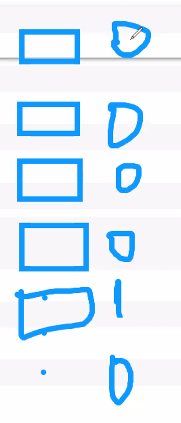

In [24]:
y_train.shape

(60000,)

In [25]:
from tensorflow.keras.utils import to_categorical
# y_train[9] un 4. indexini 1 yapacak diğerlerini 0 yapacak ve categorical hale dönüştürmeye yardımcı olacak bu metod

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[9]

4

In [28]:
Y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [67]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
# ilk katmanda Conv2D
# Filters = 32 : 32 tane filtre(nöron) olacak. 32 farklı 3x3 lük filter çalışacak 
# kernel_size = (3,3) : filtre boyutu/maske gibi isimlendiriliyor
# stride = 1, padding = vali --> default değerler
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid # pool_size=(2, 2) :  stride pool_size ile aynı olacak
model.add(Flatten()) # Düzleştiriyor. Araya bunu mutlaka ekliyoruz

# Alt kısım ANN/Feed Forward Neural network kısmı
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Çıkış da mecburen 10 nöron koyduk. Çünkü 10 adet resim var
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# class chat soru : Birden fazla conv katman ve pool yapabiliyoruz değil mi?
# John H: Yapılabilir evet
# Class chat soru: 

In [68]:
model.summary()
# class chat soru: hocam buradaki 32 filtre random mu seçiliyor?
# John H: 32 filtreden olduğu için 32 resim çıkıyor 26x26 lık.
# Edward H : arbitrary bir deger hocam keyfi. Ama tecrubeye dayali secimler yapiliyor genelde. 2'nin exponensiyelleri olacak sekilde secilir. filtre sayisindan bahsediyorsaniz eger*
# 320 update edilecek parametre sayısı. 320 nasıl bulunuyor? 
# .. Kernel size dan 3x3=9(filtre katsayıları), sonra 32x9 = 288 + 32(biaslar) = 320
# 5408x128 + 128(biasler) = 692352
# 128 x 10 + 10 = 1290

# class chat soru: Kernel size ı neye göre belirliyoruz?
# John H: Çok küçük bir filtre ile çalışırsanız çok küçük detayları işler. Büyük olursa daha büyük detaylarla uğraşırsınız
# .. Bir de 28x28 e daha büyük bir kernel kullanmak çok sağlıklı olmaz. En sağlıklı kullanım. Mesela 1500x1500 lik resimde
# .. 3x3 yerine 11x11 le başlayıp sonraki katmanlarda 7x7 kullanılabilir. Son bir kaç katmanda 3x3 lük kullanılabilir ki
# .. son katmanlarda 3x3 kullanmak daha iyi olabiliyor
# .. 3x3 ün dezavantajı calculation cost u fazladır(İşlem sayısı artar)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [32]:
((3 * 3 * 1) + 1) * 32

320

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)
# val_accuracy yerine val_loss da kullanabiliriz
# patience=2 : Neden az patience. CNN de overfitting e gitme ihtimali yüksektir. Resimler çok bilgi içeriyor ama onlara karşılık gelen data
# .. sayısı yeterli değil o yüzden resim datalarında çalışırken fazla data istenir. O yüzden patience burada genelde 2 ya da 3 tür
# Resimleri değişik oriantasyonlar/metodlar ile çoğullayacağız son derste göreceğiz.


In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop]) 
# epochs=10: Çünkü 2 tane network çalışıyor. Asıl işi yapan convolutional katman bu kadar epoch da işini hallediyor

# class chat soru: patience küçük olunca lokal minimuma yakalanma ihtimali artmıyor mu?
# Edward H : lokal minimuma yakalanmis modeli daha fazla egiterek kurtaramazsiniz hocam dolayisiyla hayir arttirmiyor. 
# .. Lokal minimuma yakalaninca gradient sifirlaniyor ve agirliklar update olmuyor artik ve model optimuma yakinsamis gibi egitim bitiyor

# class chat soru: Drop out ta kullanılıyor mu hocam overfiti engellemek için?
# John H: Dropout da kullanılabiliyor. Başka metodlarda var

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1504 - accuracy: 0.9547 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0515 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0452 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0405 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0374 - val_accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0572 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0566 - val_accuracy:

In [72]:
X_train.shape

(60000, 28, 28, 1)

In [73]:
Y_train.shape

(60000, 10)

In [74]:
model.metrics_names

['loss', 'accuracy']

In [75]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.150,0.955,0.061,0.982
1,0.051,0.985,0.052,0.983
2,0.034,0.989,0.045,0.986
3,0.021,0.993,0.041,0.988
4,0.016,0.995,0.037,0.989


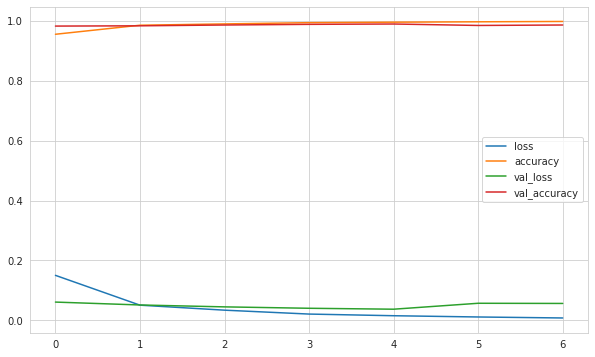

In [76]:
summary.plot();
# Aralık açılmaya başlayınca orada kesmiş(accuracy ve val_accuracy arasındaki fark)
# Aşağıda biraz daha yakından inceleyelim

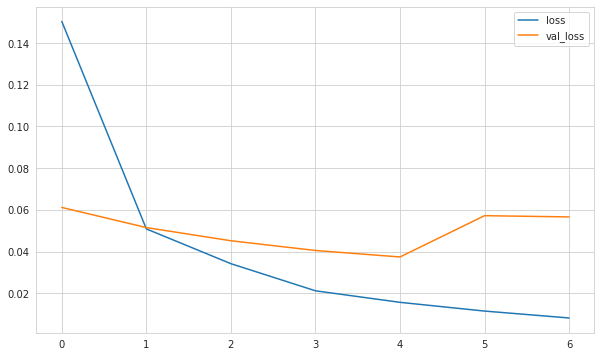

In [77]:
summary[["loss", "val_loss"]].plot();

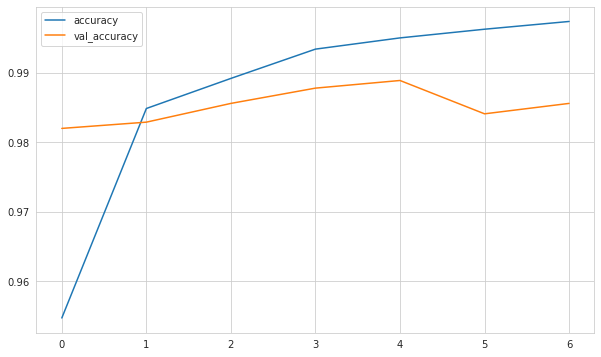

In [78]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [79]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [80]:
model.evaluate(X_test,Y_test)

# Class chat soru : validation datasını train içerisinden bölseydik hocam
# John H : Yapılabilir. Biz burada yapmadık

313/313 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9889


[0.03739839792251587, 0.9889000058174133]

In [81]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03739839792251587
Test accuracy: 0.9889000058174133


In [82]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.0453933e-10, 1.7795557e-07, 1.1874899e-07, ..., 9.9998939e-01,
        6.0151059e-08, 5.7553888e-07],
       [1.6100918e-08, 1.8904766e-06, 9.9999785e-01, ..., 6.8675654e-10,
        6.0932220e-10, 5.3963236e-12],
       [4.6747616e-07, 9.9984813e-01, 8.6657010e-06, ..., 1.8449560e-05,
        8.1970047e-06, 1.3660593e-08],
       ...,
       [2.3319344e-16, 4.2396692e-10, 4.2097554e-15, ..., 1.5458518e-08,
        2.4525180e-08, 9.6915386e-08],
       [7.4073851e-11, 5.6452109e-12, 2.1947409e-11, ..., 2.2367493e-10,
        3.6452297e-04, 2.9002331e-10],
       [3.2795256e-14, 1.7559076e-12, 1.5645467e-10, ..., 1.2451000e-14,
        1.5199608e-10, 2.3099046e-14]], dtype=float32)

In [92]:
pred_prob.shape

(10000, 10)

In [93]:
pred_prob[0]

array([1.0453933e-10, 1.7795557e-07, 1.1874899e-07, 9.7570774e-06,
       1.4516374e-09, 3.7262029e-09, 3.8395567e-15, 9.9998939e-01,
       6.0151059e-08, 5.7553888e-07], dtype=float32)

In [94]:
np.argmax(pred_prob[0]) # problar içindeki maximum değeri ver

7

In [95]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [96]:
y_pred.shape

(10000,)

In [97]:
print(classification_report(y_test, y_pred))
# Her sınıfın recall ları gayet yüksek istediğimiz gibi

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [98]:
print(confusion_matrix(y_test, y_pred))

[[ 975    0    1    1    0    0    2    0    1    0]
 [   0 1130    1    0    2    0    1    0    1    0]
 [   2    1 1016    1    2    0    0    6    4    0]
 [   0    0    0 1004    0    4    0    0    2    0]
 [   1    0    0    0  974    0    1    0    3    3]
 [   2    0    1    5    0  880    3    0    1    0]
 [   5    3    0    0    1    1  947    0    1    0]
 [   2    2    4    1    0    0    0 1017    1    1]
 [   5    0    1    1    0    1    0    2  961    3]
 [   1    1    0    6    6    6    0    3    1  985]]


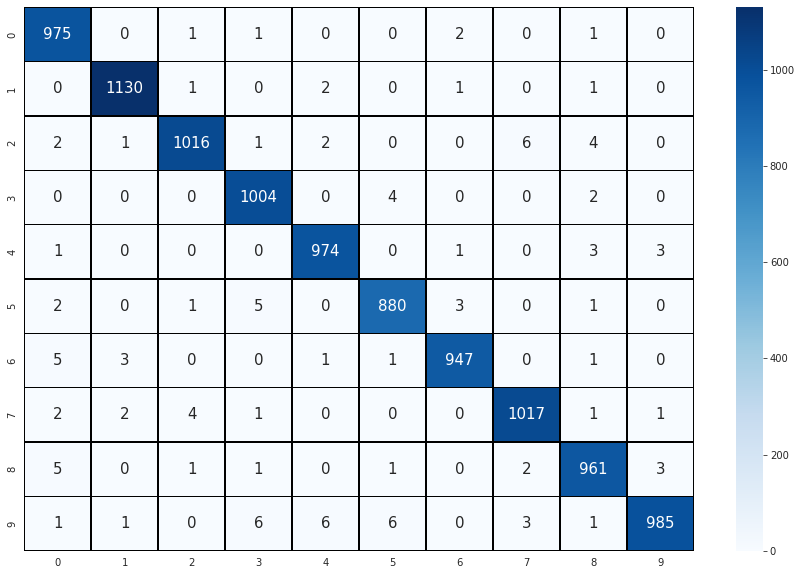

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
# Hangi kısımlarda yanlış sınıflandırma varsa, o resimlere bakıp o resimleri çıkarıp başarı arttırılabilir
# .. ya da o resim değiştirilebilir

In [100]:
y_test != y_pred 

array([False, False, False, ..., False, False, False])

In [101]:
(y_test != y_pred).sum()  # 10000 tanede 111 tane hata yapmış. John H: Çok problem değil. Gayet iyi

111

# Prediction

In [102]:
my_number = X_test[3]

In [103]:
my_number.shape

(28, 28, 1)

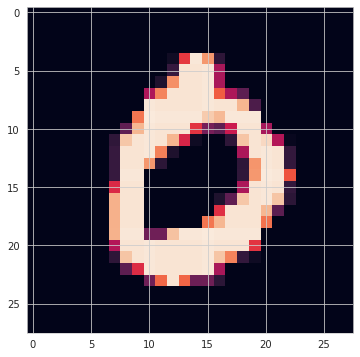

In [104]:
plt.imshow(my_number.reshape(28,28));

In [105]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))  # resmi girerken kaç channel lı resim gireceğimizi söylememiz gerekiyor modele("1,28,28,1" da ilk "1" yazan kısım)
pred_prob

array([[9.9999785e-01, 5.6507005e-10, 8.4492450e-07, 1.6375188e-09,
        3.1324101e-09, 5.3539667e-10, 9.5507482e-07, 5.8661604e-09,
        2.3947175e-07, 1.0758681e-07]], dtype=float32)

In [106]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [107]:
model.save("cnn-1.h5")

# Using

In [108]:
model=tf.keras.models.load_model('cnn-1.h5')

In [112]:
X_test[24].shape

(28, 28, 1)

In [109]:
pred=model.predict(np.expand_dims(X_test[24],axis=0)) # 3 boyuttan 4 boyuta çeviriyor. --> "1,28,28,1" şekline(reshape de kullanılabilir)

In [110]:
np.argmax(pred)

4

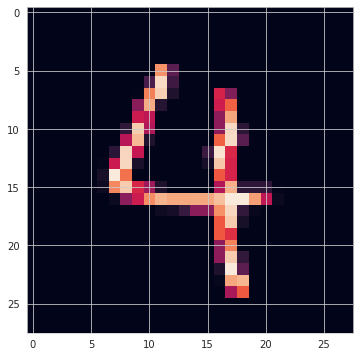

In [111]:
plt.imshow(X_test[24].reshape(28,28))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___